In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

df = pd.read_csv(r'C:\Users\Angerine\Downloads\WIDResidencyCOVIDNationalcount.csv')
df.head()


,daily_vaccinations,daily_cases
0,710238,230347
1,747082,235696
2,798707,242734
3,811670,201663
4,824632,177767


In [3]:
#checking data types -> change data types to proper types
df.dtypes

daily_vaccinations    int64
daily_cases           int64
dtype: object

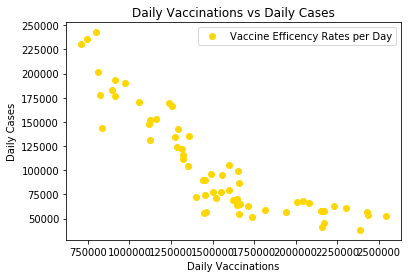

In [130]:
# assign x & y 
x = df['daily_vaccinations']
y = df['daily_cases']

# creating scatter plot
plt.plot(x, y, 'o', color = 'gold', label = 'Vaccine Efficency Rates per Day')
plt.title('Daily Vaccinations vs Daily Cases')
plt.xlabel('Daily Vaccinations')
plt.ylabel('Daily Cases')
plt.legend()
plt.show()

In [37]:
# Measuring Correlation - Strong negative relationship 
df.corr()

,daily_vaccinations,daily_cases
daily_vaccinations,1.000000,-0.862203
daily_cases,-0.862203,1.000000


In [136]:
# Split the data 
X = df.drop('daily_cases', axis = 1)
Y = df[['daily_cases']]

#40% dedicated to testing an remainng 60% for training (chose this due to small sample size)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state = 1)

In [118]:
# create linear regression model object
regression_model = LinearRegression()
# pass through the dataset
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
# Grab coefficent of model & intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print('The coefficient for our model is {:.2}'.format(coefficent))
print('The intercept for our model is {:.2}'.format(intercept))

The coefficient for our model is -0.1
The intercept for our model is 2.6e+05


In [120]:
# Making a prediction  
prediction = regression_model.predict([[824632]])
predicted_value = prediction[0][0]
print('The predicted value is {:.8}'.format(predicted_value))

The predicted value is 180450.32


In [121]:
# Making a prediction
prediction = regression_model.predict([[1657703]])
predicted_value = prediction[0][0]
print('The predicted value is {:.8}'.format(predicted_value))

The predicted value is 95772.631


In [122]:
#Multiple predictions
y_predict = regression_model.predict(X_test)
y_predict[:5]

array([[126903.1056592 ],
       [116067.42029405],
       [ 52934.86276667],
       [112886.6364312 ],
       [ 17533.56068296]])

In [123]:
#define our input
X2 = sm.add_constant(X)

#create OLS model
model = sm.OLS(Y, X2)

est = model.fit()

In [135]:
est.conf_int()

,0,1
const,231786.526326,279081.612787
daily_vaccinations,-0.112835,-0.083328


In [133]:
est.pvalues
# There is a relationship between daily vaccinations and daily cases 
# because coefficent does not equal 0

const                 2.865734e-30
daily_vaccinations    1.127637e-19
dtype: float64

In [134]:
# Model Fit
model_mse = mean_squared_error(y_test, y_predict)
model_mae = mean_absolute_error(y_test, y_predict)
model_rmse = math.sqrt(model_mse)

#displaying output
print("MSE {:.12}".format(model_mse))
print("MAE {:.8}".format(model_mae))
print("RMSE {:.8}".format(model_rmse))

MSE 1013605348.48
MAE 26535.611
RMSE 31837.169


In [132]:
#R-Squared 
# What is says: our data explains 46% of the variance
# We think that is good for the domain of the data we are working with
# Hard to control all external factors (spread of COVID like population, rural vs city)

model_r2 = r2_score(y_test, y_predict)
print("R2 {:2}".format(model_r2))

R2 0.5866277274310072


In [128]:
# Print out summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            daily_cases   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           1.13e-19
Time:                        07:26:05   Log-Likelihood:                -732.47
No. Observations:                  63   AIC:                             1469.
Df Residuals:                      61   BIC:                             1473.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.554e+05   1.18

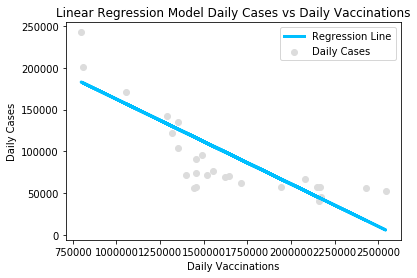

In [131]:
#Plotting our line on graph

plt.scatter(X_test, y_test, color = 'gainsboro', label = 'Daily Cases')
plt.plot(X_test, y_predict, color = 'deepskyblue', linewidth = 3, linestyle = '-', label = 'Regression Line')

plt.title("Linear Regression Model Daily Cases vs Daily Vaccinations")
plt.xlabel('Daily Vaccinations')
plt.ylabel('Daily Cases')
plt.legend()
plt.show()